In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, f1_score, recall_score

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [2]:
data = pd.read_csv('./Water Flow Datasets.csv')

In [14]:
data.head()

data.describe()

,Tm/s,Flow,Velocity,S,Status
0,101.5,29.462,2.2088,"844,844",No Leaking
1,101.5,29.516,2.2144,"844,844",No Leaking
2,101.5,29.246,2.2002,"844,844",No Leaking
3,101.5,29.242,2.2045,"844,844",No Leaking
4,101.5,29.307,2.2049,"844,844",No Leaking


In [3]:
new_data = data.copy()
new_data['Status'] = (new_data['Status'] == 'Leaking').astype('int')

In [4]:
train_data, test_data = train_test_split(new_data[['Flow ', 'Velocity', 'Status']], random_state=0, test_size=0.3)

train_x = train_data[['Flow ', 'Velocity']]
train_y = train_data['Status']

test_x = test_data[['Flow ', 'Velocity']]
test_y = test_data['Status']

In [68]:
def evaluation(model):

    train_pred = model.predict(train_x)
    test_pred = model.predict(test_x)

    train_acc = accuracy_score(train_y, train_pred)
    test_acc = accuracy_score(test_y, test_pred)


    train_precision = precision_score(train_y, train_pred)
    test_precision = precision_score(test_y, test_pred)

    train_recall = recall_score(train_y, train_pred)
    test_recall = recall_score(test_y, test_pred)

    train_f1 = f1_score(train_y, train_pred)
    test_f1 = f1_score(test_y, test_pred)

    train_confu_matrix = confusion_matrix(train_y, train_pred, labels=model.classes_)
    test_confu_matrix = confusion_matrix(test_y, test_pred, labels=model.classes_)

    train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confu_matrix,
                              display_labels=model.classes_)
    
    test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confu_matrix,
                              display_labels=model.classes_)

    evaluation = [train_acc, train_precision, train_recall, train_f1, test_acc, test_precision, test_recall, test_f1]
    return evaluation, train_disp, test_disp

def prepare(prediction):

    pred = (prediction >= 0.5).astype('int')
    pred = [x[0] for x in pred]
    return pred

def evaluate_ann(model):
    
    train_pred = model.predict(train_x)
    test_pred = model.predict(test_x)

    train_pred = prepare(train_pred)
    test_pred = prepare(test_pred)
    
    train_acc = accuracy_score(train_y, train_pred)
    test_acc = accuracy_score(test_y, test_pred)


    train_precision = precision_score(train_y, train_pred)
    test_precision = precision_score(test_y, test_pred)

    train_recall = recall_score(train_y, train_pred)
    test_recall = recall_score(test_y, test_pred)

    train_f1 = f1_score(train_y, train_pred)
    test_f1 = f1_score(test_y, test_pred)

    train_confu_matrix = confusion_matrix(train_y, train_pred)
    test_confu_matrix = confusion_matrix(test_y, test_pred)

    classes = [0,1]
    train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confu_matrix,
                              display_labels=classes)
    
    test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confu_matrix,
                              display_labels=classes)

    evaluation = [train_acc, train_precision, train_recall, train_f1, test_acc, test_precision, test_recall, test_f1]
    return evaluation, train_disp, test_disp

In [69]:
ann_model = Sequential()
ann_model.add(Dense(16, input_shape = (2,), activation = 'relu'))
ann_model.add(Dense(1, activation = 'sigmoid'))
ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = ann_model.fit(train_x, train_y, epochs = 100, validation_data = (test_x, test_y), verbose = 0)

In [64]:
lr = LogisticRegression()
lr.fit(train_x, train_y)


svc = SVC(kernel='rbf')
svc.fit(train_x, train_y)


lr_model_evaluation, lr_train_confu_matrix, lr_test_confu_matrix = evaluation(lr)
svc_model_evaluation, svc_train_confu_matrix, svc_test_confu_matrix = evaluation(svc)
ann_model_evaluation, ann_train_confu_matrix, ann_test_confu_matrix = evaluate_ann(ann_model)

lr_model_evaluation.insert(0, 'Logistic Regression')
svc_model_evaluation.insert(0, 'SVM Classifier')
ann_model_evaluation.insert(0, 'Artificial Neural Network')

output = pd.DataFrame(columns=['Model_Name', 'Train_Accuracy', 'Train_Precision', 
                               'Train_Recall', 'Train_F1_score',
                               'Test_Accuracy', 'Test_Precision',
                               'Test_Recall', 'Test_F1_Score'])


output.loc[0] = lr_model_evaluation
output.loc[1] = svc_model_evaluation
output.loc[2] = ann_model_evaluation

output.to_csv('results.csv')
output.head()

21/21 [==============================] - 0s 3ms/step


,Model_Name,Train_Accuracy,Train_Precision,Train_Recall,Train_F1_score,Test_Accuracy,Test_Precision,Test_Recall,Test_F1_Score
0,Logistic Regression,0.981033,0.998808,0.967667,0.982991,0.974085,1.0,0.955381,0.977181
1,SVM Classifier,0.984303,1.000000,0.972286,0.985948,0.977134,1.0,0.960630,0.979920
2,Artificial Neural Network,0.979071,0.998804,0.964203,0.981199,0.969512,1.0,0.947507,0.973046


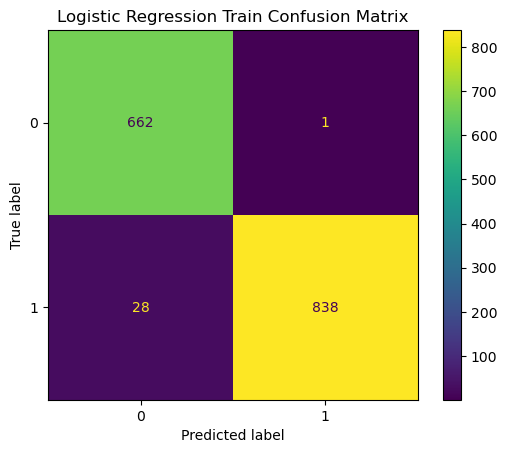

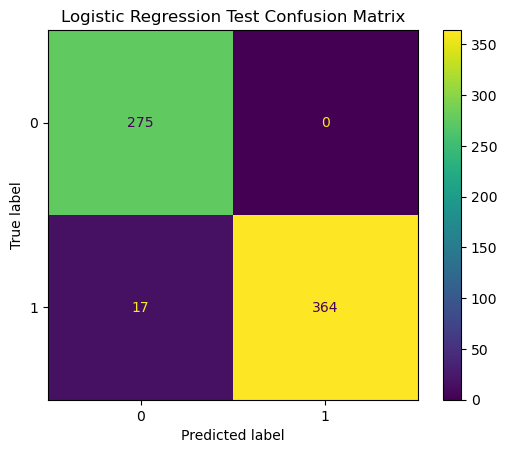

In [65]:
lr_train_confu_matrix.plot()
plt.title('Logistic Regression Train Confusion Matrix')
plt.show()

lr_test_confu_matrix.plot()
plt.title('Logistic Regression Test Confusion Matrix')
plt.show()

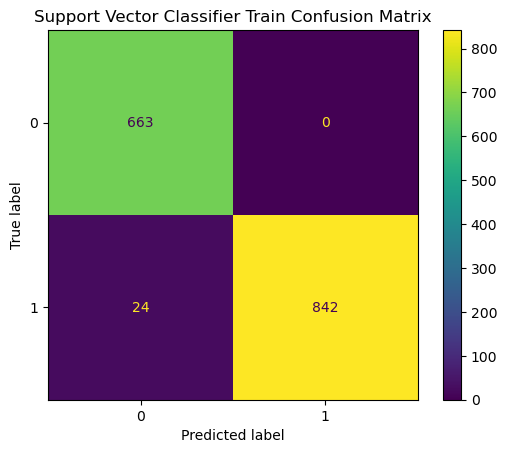

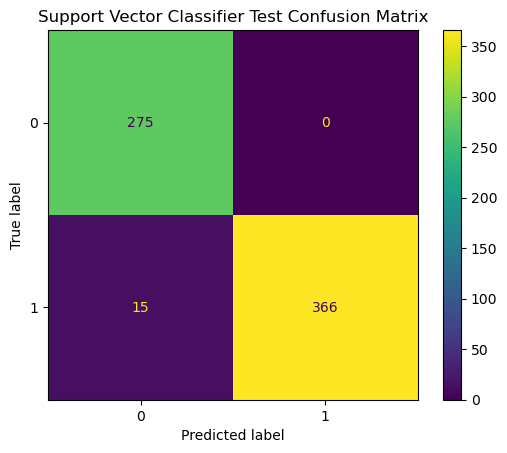

In [66]:
svc_train_confu_matrix.plot()
plt.title('Support Vector Classifier Train Confusion Matrix')
plt.show()

svc_test_confu_matrix.plot()
plt.title('Support Vector Classifier Test Confusion Matrix')
plt.show()

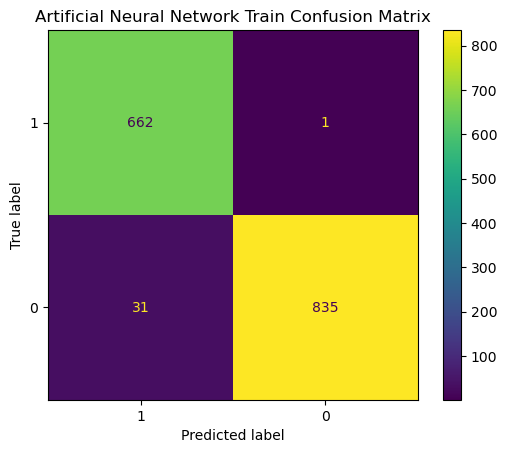

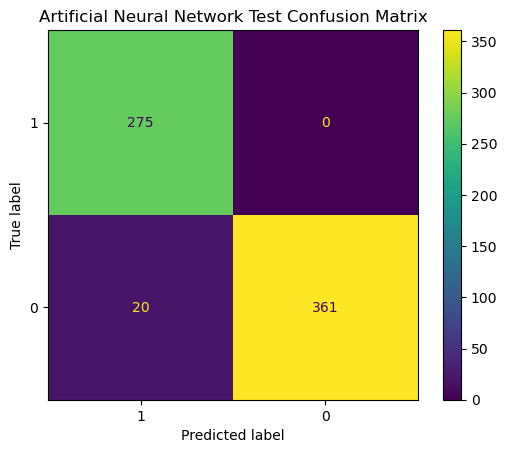

In [67]:
ann_train_confu_matrix.plot()
plt.title('Artificial Neural Network Train Confusion Matrix')
plt.show()

ann_test_confu_matrix.plot()
plt.title('Artificial Neural Network Test Confusion Matrix')
plt.show()

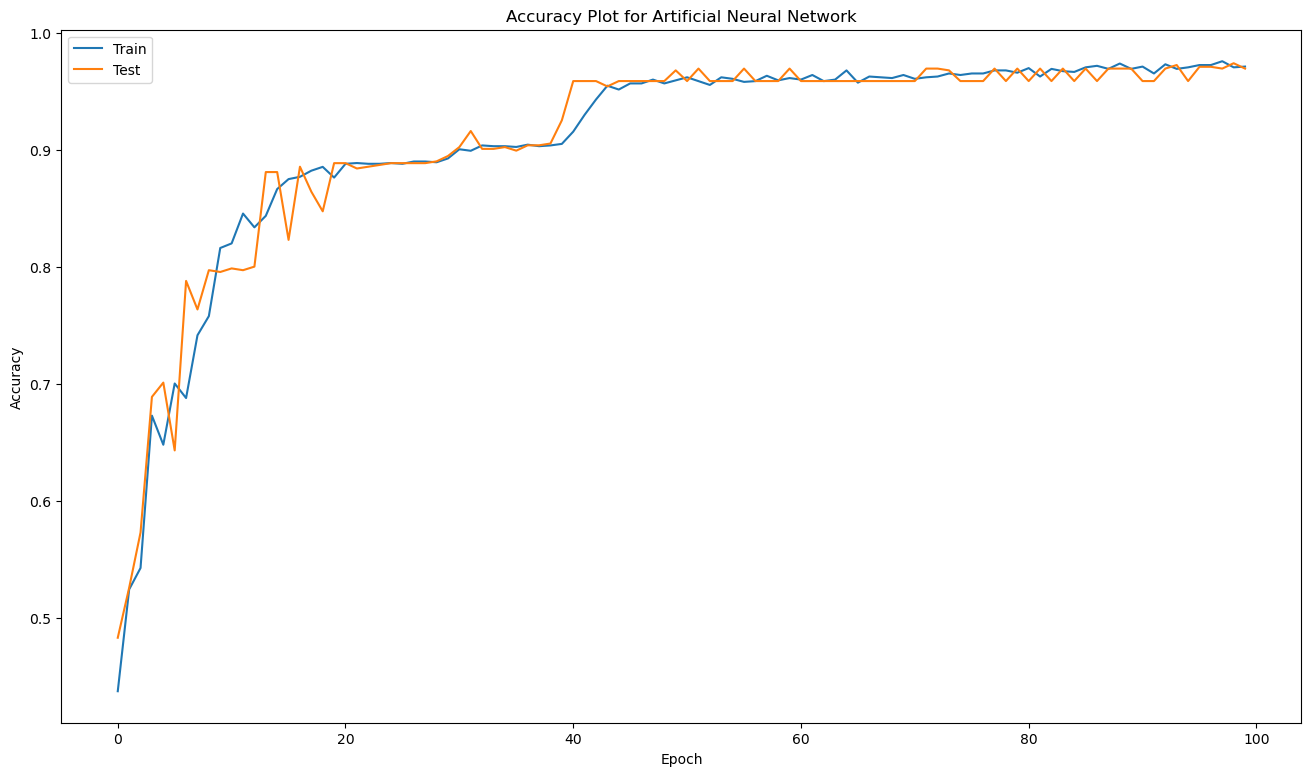

In [33]:
plt.figure(figsize=(16,9))

plt.plot(hist.history['accuracy'], label = 'Train')
plt.plot(hist.history['val_accuracy'], label = 'Test')
plt.legend()
plt.title('Accuracy Plot for Artificial Neural Network')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig('accracy plot.jpg')

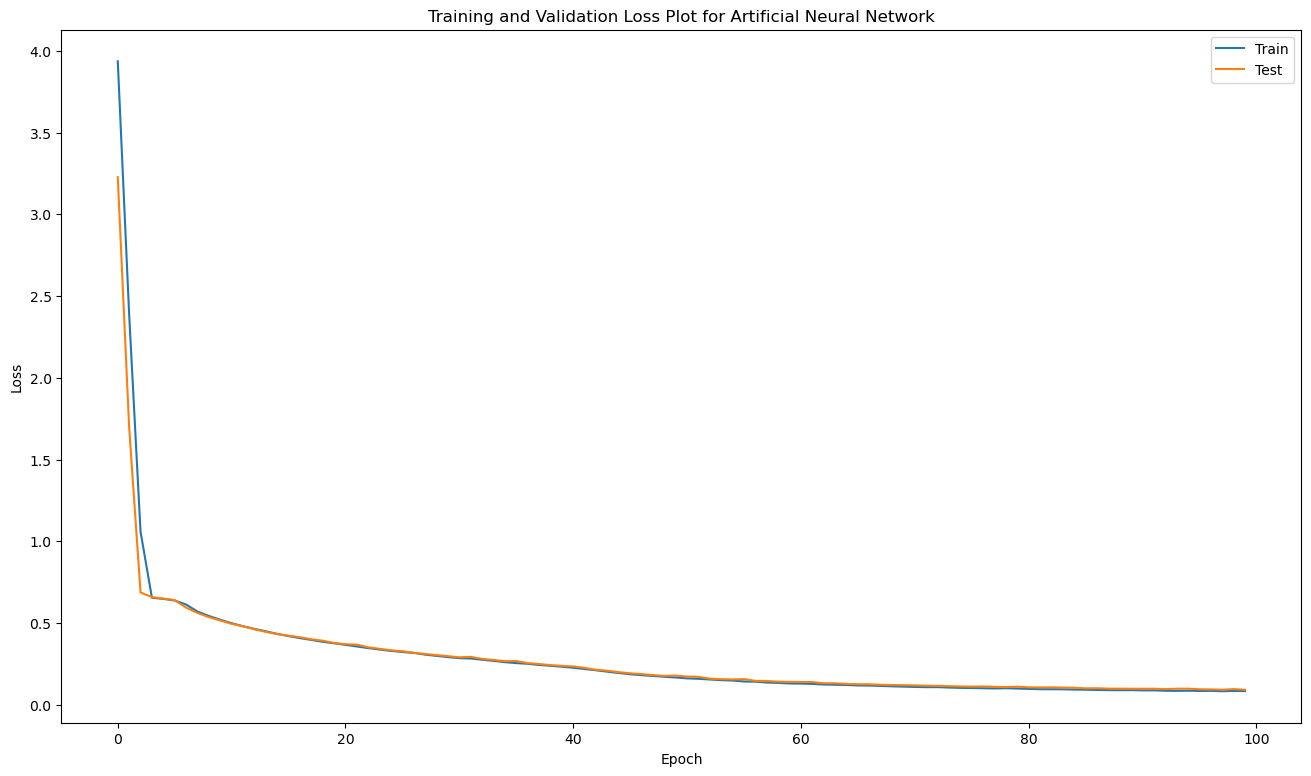

In [34]:
plt.figure(figsize=(16,9))

plt.plot(hist.history['loss'], label = 'Train')
plt.plot(hist.history['val_loss'], label = 'Test')

plt.title('Training and Validation Loss Plot for Artificial Neural Network')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('loss plot.jpg')
plt.legend()